In [1]:
import pandas as pd
import numpy as np
import pickle
from Commen_Functions import get_score, get_score_df, merge_Results, load_sets

In [42]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
SETS = 1
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_GridHDDC.pkl', 'rb') as f:
    bic_df = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/MergedClustersHDDC.pkl', 'rb') as f:
    clustersHDDC = pickle.load(f)

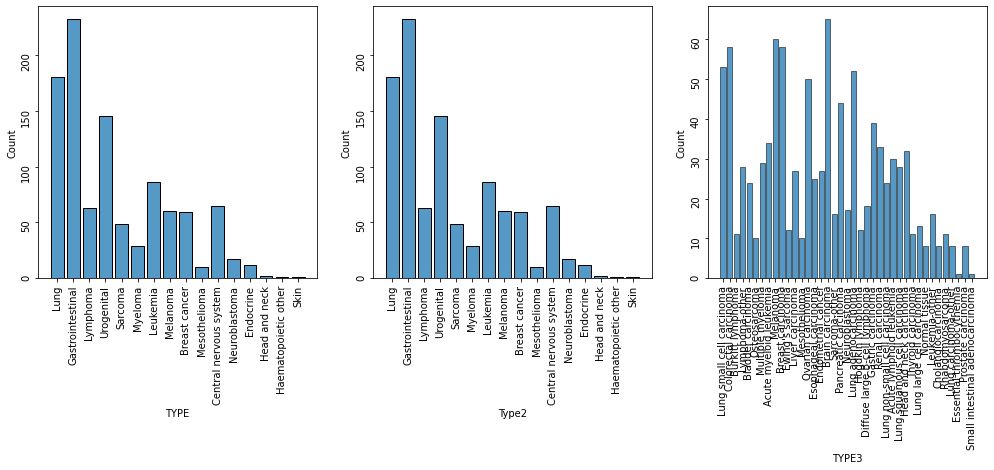

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df, df_normalized, Type_df = load_sets(1)
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="TYPE3", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

In [5]:
df, df_normalized, Type_df = load_sets(2)

In [6]:
df.groupby('TYPE').count()['2597'].sort_values()

TYPE
Cholangiocarcinoma                    4
Vulva cancer                          8
Periampullary cancer                  9
primitive neuroectodermal tumor      22
Bladder cancer                       39
Cervical cancer                      62
Pancreas cancer                      81
Thyroid cancer                       97
Esophageal cancer                    97
Adrenal cancer                      137
Ovarian cancer                      187
Renal cancer                        304
Prostate cancer                     308
Gastric cancer                      332
Myelodysplastic syndrome            342
Sarcoma                             344
HCC                                 364
HNSCC                               386
Melanoma                            504
Lymphoma                            961
Brain cancer                       1115
Multiple myeloma                   1316
Lung cancer                        1527
Colorectal cancer                  2710
Breast cancer                      

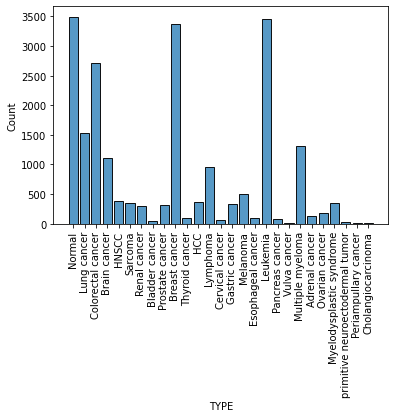

In [7]:
sns.histplot(data=df, x="TYPE", shrink=.8)
plt.xticks(rotation=90)
plt.show()

In [8]:
df, df_normalized, Type_df = load_sets(4)

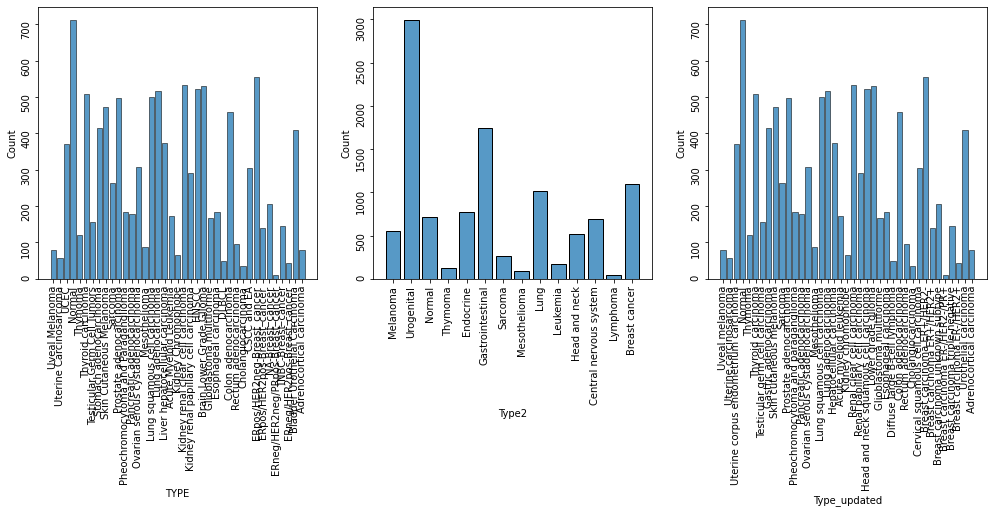

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type_updated", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# loads = [(2, 'TYPE', -1, 'GPL570'), (1, 'TYPE', -3, 'CCLE'), (4, 'Type2', -5, 'TCGA')]
# for load in loads:
#     df, df_normalized, Type_df = load_sets(load[0])
#     for cancer_type, sub_df in df.groupby(load[1]):
#         sub_df = sub_df.select_dtypes([np.number])
#         scaler = StandardScaler()
#         values = scaler.fit_transform(sub_df)
#         cancer_norm_df = pd.DataFrame(values, columns = sub_df.columns, index=sub_df.index)
#         cancer_norm_df.to_csv(f'/data/g0017139/ICA_files/{load[3]}__Type_{cancer_type}.csv')
#     #temp_df = df.copy()
#     #try:
#     #    temp_df.iloc[:,:load[2]] = df_normalized.values
#     #except AttributeError: 
#     #    temp_df.iloc[:,:load[2]] = df_normalized
#     #for cancer_type, sub_df in temp_df.groupby(load[1]):
#     #    sub_df = sub_df.select_dtypes([np.number])
#     #    sub_df.to_csv(f'/data/g0017139/ICA_files/{load[3]}__Type_{cancer_type}.csv')



In [12]:
df, df_normalized, Type_df = load_sets(SETS)

In [13]:
from distinctipy import distinctipy
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def make_colors(df):
    cluster_colors = distinctipy.get_colors(max(15, len(set(df['Type']))),
                                colorblind_type='Deuteranomaly', n_attempts=10_000)
    cluster_colors = ['#%02x%02x%02x' % tuple((np.array(x)  * 250).astype(int)) for x in cluster_colors]

    color_mapper = dict(zip(set(df['Type']), cluster_colors))
    palette = []
    for key in sorted(color_mapper):
        palette.append(color_mapper[key])
    palette = sns.color_palette(palette)
    return cluster_colors, color_mapper, palette

In [14]:
def make_countplot(df, x, hue, pallete): 
    pallette = sns.set_palette(pallete)
    # Make the figure
    fig = plt.figure(figsize=(15,8))
    df = df.sort_values(hue)
    g = sns.countplot(x=x, hue=hue, palette=pallette, edgecolor=".6", 
                      data=df)
    g.get_legend().remove()
    g.set_title('Absoulte counts')
    
    fig2 = plt.figure(figsize=(15,8))
    counts = (df.groupby([hue])[x]
              .value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(hue))
    g1 = sns.barplot(x=x, y="percentage", hue=hue,
                     data=counts, palette=pallette, edgecolor=".6")

    g1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g1.set_title('Relative counts')
    return fig, fig2

In [15]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)

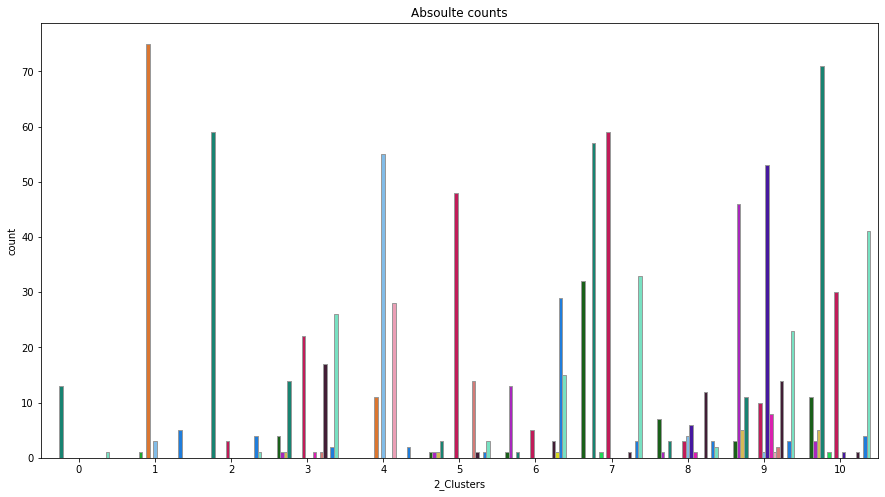

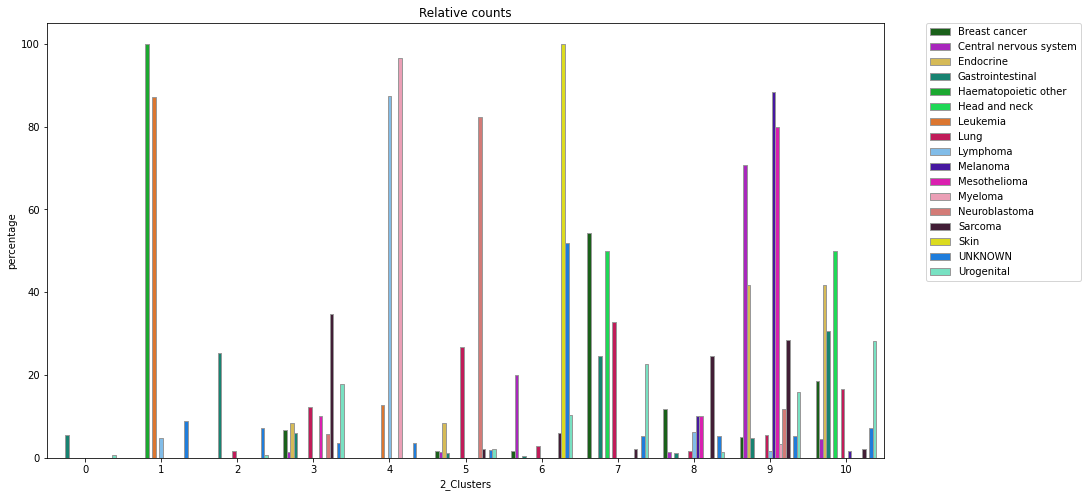

In [83]:
cluster_df = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/HDDCClusters11.csv", index_col=0)
#cluster_df = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/HierarchClusters11.csv", index_col=0)
cluster_df.columns = ['2_Clusters']
cluster_df['2_Clusters'] = cluster_df['2_Clusters'] - 1
cluster_df['Type'] = df['TYPE'].values
cluster_df = cluster_df.fillna('UNKNOWN')
cluster_colors, color_mapper, palette = make_colors(cluster_df)
make_countplot(cluster_df, '2_Clusters', 'Type', palette)
plt.show()

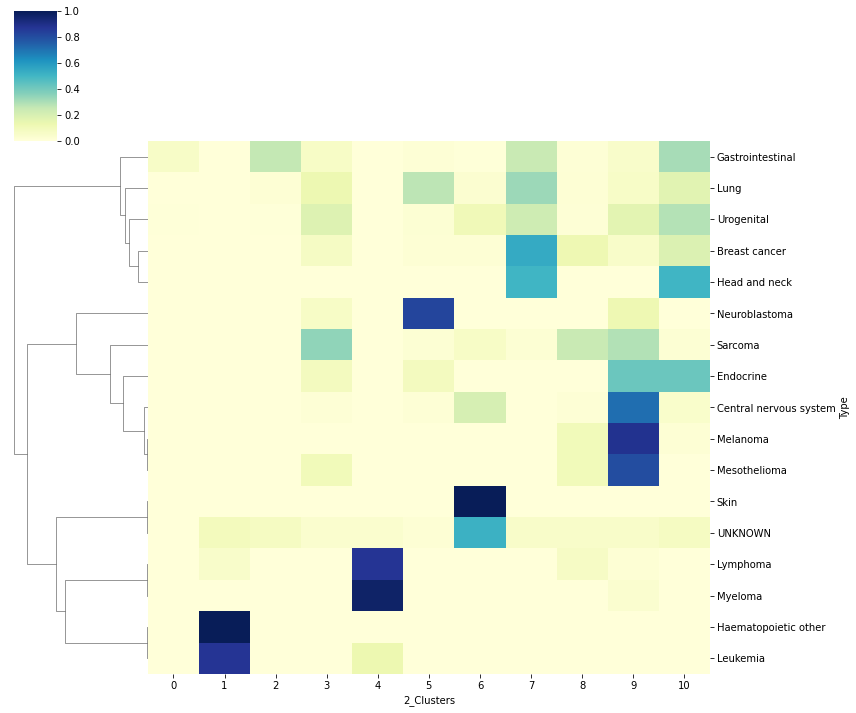

In [84]:
cluster_df['count'] = 1
count_df = cluster_df.groupby(['2_Clusters', 'Type']).sum().reset_index()
sum_df = cluster_df.groupby(['Type']).sum()
new_col = []
for index, row in count_df.iterrows():
    new_col.append(sum_df.loc[row['Type'],:]['count'])

count_df['Percentage'] = count_df['count'] / new_col
count_df = count_df.drop('count', axis=1)
data = pd.pivot_table(count_df, values='Percentage', index='Type', columns='2_Clusters', fill_value=0)
#plt.figure(figsize=(15,10))
##ax = sns.heatmap(data, vmin=0, vmax=1, linewidths=.5, cmap="YlGnBu")
fig= sns.clustermap(data, method="ward", metric="correlation", col_cluster=False,  cmap="YlGnBu", figsize=(12,10))

In [85]:
cluster_df.groupby(['2_Clusters']).sum()

,count
2_Clusters,
0,14
1,84
2,67
3,89
4,96
5,73
6,68
7,186
8,42


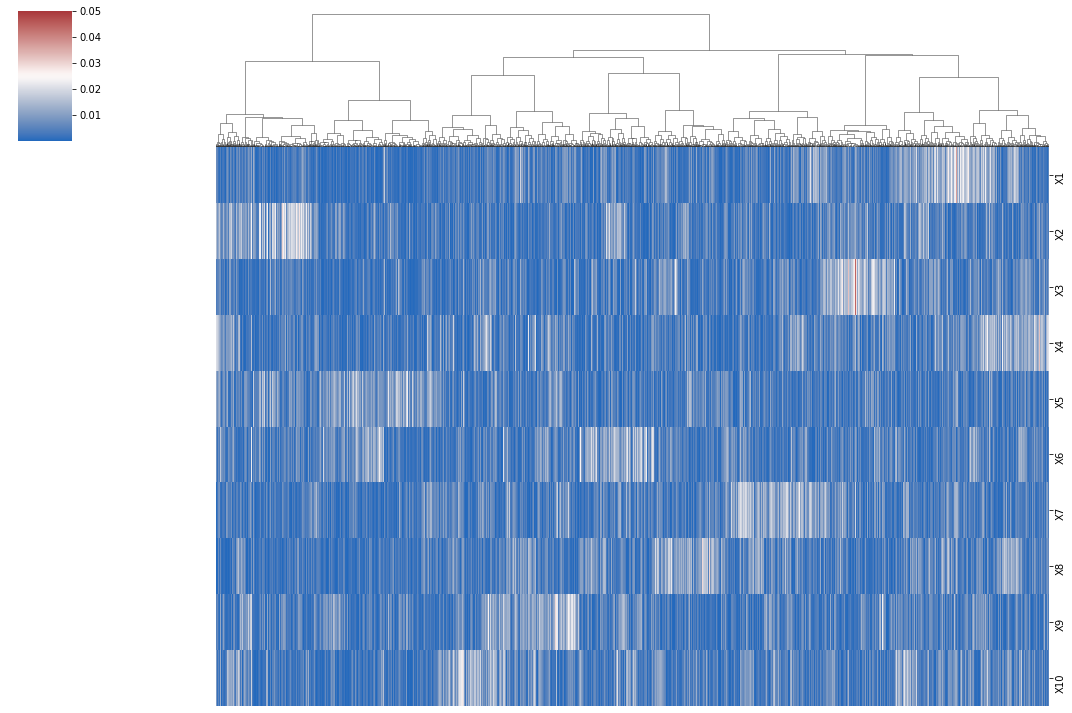

In [66]:
eigenvectors = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/eigenvec0clusters4.csv", index_col=0)

sns.clustermap(eigenvectors.abs().T, xticklabels=False, method="ward", metric="correlation",
               row_cluster=False,  cmap="vlag", figsize=(15,10))
plt.show()

In [67]:
eigenvectors = eigenvectors.abs()
if SETS == 1:
    eigenvectors.index = df.columns[:-3]
elif SETS == 2:
     eigenvectors.index = df.columns[:-1]
elif SETS == 3:
    eigenvectors.index = df.columns[:-5]

In [68]:
def get_genes(eigenvectors):
    important_genes = []
    ids = []
    eigenvectors.index = [str(x) for x in eigenvectors.index]
    for column in eigenvectors:
        values = eigenvectors[column].nlargest(5).index
        values = [str(x) for x in values]
        #value = str(eigenvectors.index[eigenvectors[column].argmax()])
        for value in values:
            if value not in ids:
                ids.append(str(value))
            weight = eigenvectors[column][value]
            title = column.replace('X', 'Component ')
            important_genes.append((title,value,weight))
    #important_genes.append(('Test', '3198', 0.012))
    #ids.append('3198')
    Entrez_Map['mapped_entrez_v1'] = Entrez_Map['mapped_entrez_v1'].astype(str)
    important_genes_df = Entrez_Map[Entrez_Map['mapped_entrez_v1'].isin(ids)]
    return important_genes, important_genes_df, ids


In [69]:
important_genes, important_genes_df, ids = get_genes(eigenvectors)

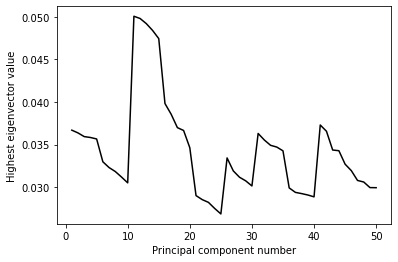

In [70]:
x_axis = []
y_axis = []
for i, x in enumerate(important_genes):
    x_axis.append(i + 1)
    y_axis.append(x[2])
sns.lineplot(x=x_axis, y=y_axis, color='black')
plt.xlabel('Principal component number')
plt.ylabel('Highest eigenvector value')
plt.show()

In [71]:
print(' '.join(important_genes_df['SYMBOL'].astype(str).values))

HSPB7 LINC01343 UBE2Q1 FAM201B CFAP65 CCDC13 ROPN1B ESM1 IL31RA PCDHB7 PCDHB9 PCDHB10 ABLIM3 TIMD4 HAVCR1 SLC17A3 EVX1 LOC101928618 PSMC2 SLC34A3 C10orf71-AS1 HOGA1 PLPP4 MRVI1 LIN7C TYR ATF7 LINC02274 LRRC74A EXOC3L1 KRTAP1-5 GFAP TAC4 SCAT1 ENPP7 TXNDC2 HSPB6 COX7A1 CA11 SCAF1 LINC01711 LAMA5-AS1 KRTAP10-11 S100B TBX1 SOX10 ZC3H7B DDX3X RTL3 PLP1


In [72]:
important_genes

[('Component 1', '126393', 0.0366982989527714),
 ('Component 1', '83895', 0.0363725513440773),
 ('Component 1', '10335', 0.0359408714499229),
 ('Component 1', '27129', 0.0358373116906414),
 ('Component 1', '1346', 0.0356637167161041),
 ('Component 2', '23264', 0.0329853931843859),
 ('Component 2', '2128', 0.0323071268116051),
 ('Component 2', '339742', 0.0318425410409926),
 ('Component 2', '283849', 0.0311947299611442),
 ('Component 2', '255101', 0.03051245375722),
 ('Component 3', '6663', 0.0500724307151371),
 ('Component 3', '152015', 0.0498057017413425),
 ('Component 3', '6285', 0.049203822909346),
 ('Component 3', '5354', 0.0484120055960916),
 ('Component 3', '7299', 0.047446694301148),
 ('Component 4', '100506498', 0.0398235077018019),
 ('Component 4', '10786', 0.0385634443960745),
 ('Component 4', '26762', 0.0369947732168871),
 ('Component 4', '112817', 0.036660928814597),
 ('Component 4', '91937', 0.0346323535268462),
 ('Component 5', '152206', 0.0290139649203567),
 ('Component 

In [25]:
# Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
#                                sep=None, engine='python', header=0,
# )
# Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)
# Entrez_Map = Entrez_Map[['mapped_entrez_v1', 'CHR_Mapping', 'BP_Mapping']]
# Entrez_Map.columns = ['gene_id', 'CHR_Mapping', 'BP_Mapping']
# Entrez_Map.to_csv('/data/g0017139/EntrezMapping.tsv', sep = '\t', index=False)

In [26]:
# mapped_entrez_v1 , CHR_Mapping, BP_Mapping, same names, tab seperated

In [31]:
df.columns = [str(x) for x in df.columns]
get_cols = [str(x) for x in ids]
#get_cols = [str(x) for x in df.columns]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

box_df = box_df.fillna('UNKNOWN')

In [32]:
from scipy.stats import mannwhitneyu, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def man_witney(df, genes):
    for x in genes:
        a = df[df['Clusters'] == 1][x[1]].values
        b = df[df['Clusters'] == 2][x[1]].values
        p = mannwhitneyu(a, b)[1]
        if p < 0.05:
            print(f'Gene \u001b[36m{x[1]}\x1b[0m has a p value of {p}')
        else:
            print(f'Gene {x[1]} has a p value of {p}')

def kruskal_test(df, genes):
    sig_genes = []
    for x in genes:
        groups = []
        for y in df['Clusters'].unique():
            groups.append(df[df['Clusters'] == y][x[1]].values)
        p = kruskal(*groups)[1]
        if p < 0.05:
            sig_genes.append(x)
            print(f'Gene \u001b[36m{x[1]}\x1b[0m has a p value of {p}')
        else:
            print(f'Gene {x[1]} has a p value of {p}')
    return sig_genes

In [33]:
from scipy.stats import mannwhitneyu
#important_genes = [('test', x, 0) for x in df.columns]
significant_genes = kruskal_test(box_df, important_genes)

Gene 608 has a p value of 6.307504911019619e-41
Gene 2776 has a p value of 3.4255671194673086e-12
Gene 4778 has a p value of 1.600625664122805e-22
Gene 7940 has a p value of 2.6130617660108964e-60
Gene 199 has a p value of 1.361246568253198e-55
Gene 1840 has a p value of 1.8463446714146942e-08
Gene 29802 has a p value of 1.0435966092660995e-14
Gene 79037 has a p value of 2.4151460138704837e-43
Gene 100847062 has a p value of 1.4010794562698216e-18
Gene 973 has a p value of 5.2322218269921035e-37
Gene 56978 has a p value of 0.0003214670859246531
Gene 198437 has a p value of 0.00020438716563727022
Gene 2875 has a p value of 0.000350516558669155
Gene 284353 has a p value of 0.5890999121062046
Gene 1339 has a p value of 2.4982234724911456e-05
Gene 4068 has a p value of 1.4943486501080844e-20
Gene 387357 has a p value of 7.43477279538086e-17
Gene 910 has a p value of 1.245213466595569e-05
Gene 100996286 has a p value of 0.0010147021351668492
Gene 7535 has a p value of 1.8493592121929817e-29

In [36]:
tukey = pairwise_tukeyhsd(endog=box_df['608'],
                          groups=box_df['Clusters'],
                          alpha=0.05)
results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
results = results[results['reject'] == True]
results = results[((results['group1'] == 1) | (results['group2'] == 1))]
results

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,3.3966,0.001,3.0169,3.7763,True
3,1,2,-3.4664,0.001,-3.8335,-3.0993,True
4,1,3,-3.4568,0.001,-3.9552,-2.9585,True


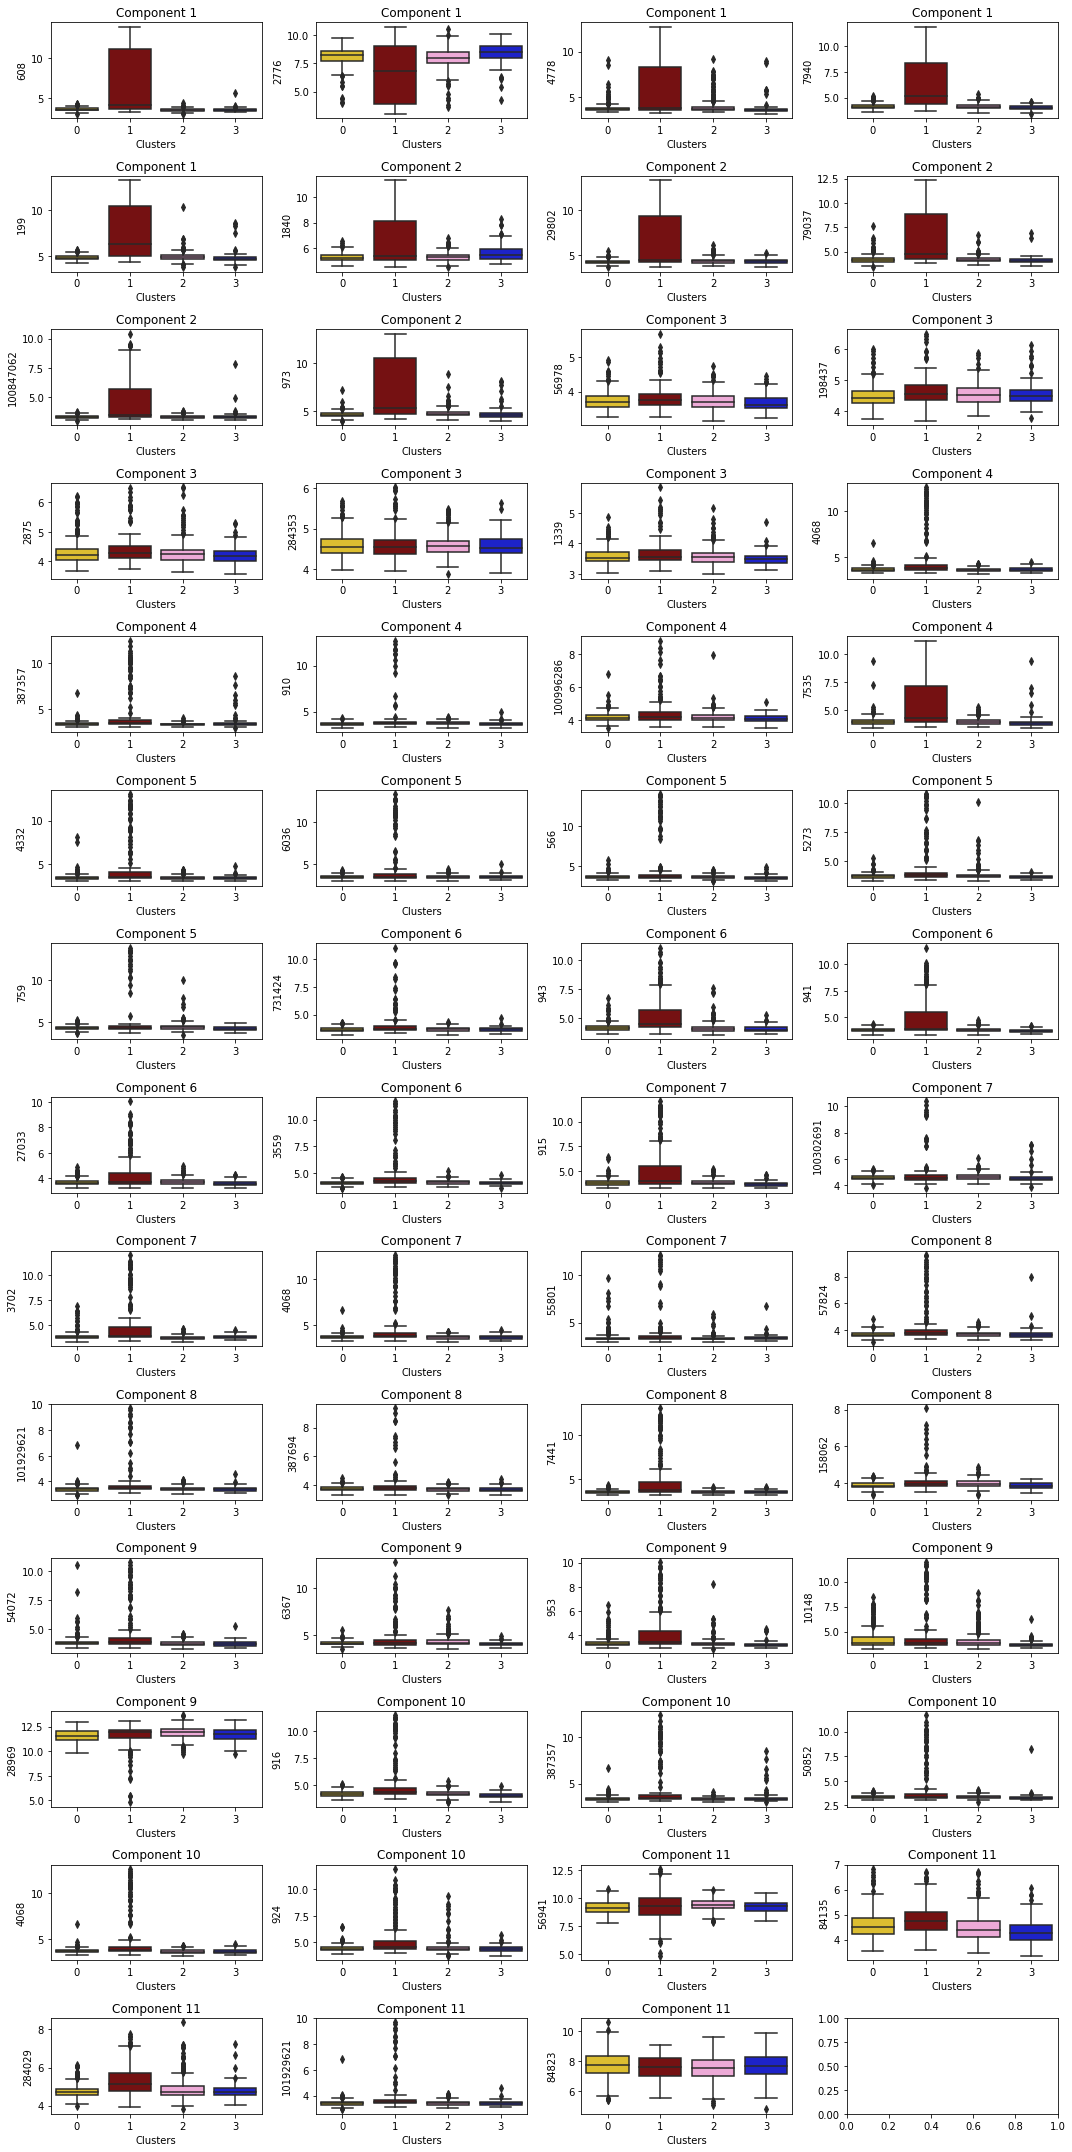

In [37]:
def make_boxplots(df, genes):
    size = len(genes) // 4
    if len(genes) % 4 != 0:
        size += 1
    fig, axs = plt.subplots(size,4, figsize=(15,30))
    i = 0
    axs = axs.ravel()
    for x in genes:
        sns.boxplot(x="Clusters", y=x[1], data=df,ax=axs[i])
        axs[i].set_title(x[0])
        i += 1
    fig.tight_layout()
make_boxplots(box_df, important_genes)